### Imports

In [58]:
import numpy as np
from scipy.special import beta
import matplotlib.pyplot as plt

### Inverse Transform

In [ ]:
def function_to_calculate_mean(x: float) -> float:
    """Returns the function to calculate the mean."""
    return 1 / (1 + x**2)

In [57]:
n_samples = 100000
uniform_samples = np.random.uniform(size=(n_samples, 1))
exponential_1_truncated_samples = - np.log(1 - uniform_samples * (1 - np.exp(-1)))
samples_from_functions = function_to_calculate_mean(exponential_1_truncated_samples)
inverse_transform_mean = np.mean(samples_from_functions)
print(f"Inverse Transform Mean: {inverse_transform_mean}")

Inverse Transform Mean: 0.8303590228827514


### Accept-Reject Sampling

In [155]:
def exponential_1_truncated_0_1(x: float) -> float:
    """Returns a exponential distribution with mean 1 truncated in [0, 1]."""
    return np.exp(-x)/(1 - np.exp(-1))

def uniform_density(x: float) -> float:
    """Returns a beta distribution with parameters 1 and 3."""
    return x**0 / beta(1, 1)

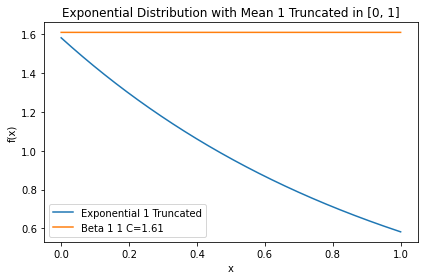

In [157]:
n_samples = 1000000
C = 1.61
linspace_samples = np.linspace(0, 1, n_samples)
exponential_1_truncated_samples = exponential_1_truncated_0_1(linspace_samples)
uniform_samples = uniform_density(linspace_samples)

plt.plot(linspace_samples, exponential_1_truncated_samples, label="Exponential 1 Truncated")
plt.plot(linspace_samples, C*uniform_samples, label=f"Beta 1 1 C={C}")
plt.title("Exponential Distribution with Mean 1 Truncated in [0, 1]")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.tight_layout()
plt.show()

In [158]:
test_uniform_samples = np.random.uniform(size=(n_samples, 1))
fx = exponential_1_truncated_0_1(uniform_samples)
cgx = C*uniform_density(uniform_samples)
acceptance_criteria = test_uniform_samples < (fx/cgx).reshape(-1, 1)
accept_reject_samples = test_uniform_samples[acceptance_criteria]
accept_reject_mean = np.mean(function_to_calculate_mean(accept_reject_samples))
print(f"Accept Reject Mean: {accept_reject_mean}")
print(f"Acceptance Ratio: {np.mean(accept_reject_samples)}")

Accept Reject Mean: 0.9596323551762777
Acceptance Ratio: 0.18052802292385842


In [159]:
test_uniform_samples.min(), test_uniform_samples.max(), np.mean(test_uniform_samples)

(9.685267654546692e-08, 0.9999998258867804, 0.49971287298931627)

In [160]:
uniform_samples.min(), uniform_samples.max(), np.mean(uniform_samples)

(1.0, 1.0, 1.0)

### Importance sampling

In [44]:
def inverse_beta_2_3(x: float) -> float:
    """Returns a inverse of beta pdf with parameters 2 and 3."""
    return beta(2,3)/(x * (1 - x)**2)

n_samples = 100000
beta_samples = np.random.beta(2, 3, size=(n_samples,1))
importance_samples = (
    function_to_calculate_mean(beta_samples) *
    exponential_1_truncated_0_1(beta_samples) *
    inverse_beta_2_3(beta_samples)
    )
sample_mean = np.mean(importance_samples)
print(f"Sample mean: {sample_mean}")

Sample mean: 0.8419302150308828
